In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('../dataset/Loan_Default.csv')
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [34]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [35]:
data['Gender'].value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

In [36]:
data['age'].value_counts()

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

In [37]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [38]:
drop_columns = ['loan_limit', 'rate_of_interest', 'Interest_rate_spread','Upfront_charges', 'property_value', 'dtir1', 'LTV']
data.drop(columns=drop_columns, inplace=True)
data

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1
1,24891,2019,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1
2,24892,2019,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0
3,24893,2019,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0
4,24894,2019,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,1U,7860.0,CIB,659,EXP,55-64,to_inst,south,direct,0
148666,173556,2019,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,4U,7140.0,CIB,569,CIB,25-34,not_inst,south,direct,0
148667,173557,2019,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,1U,6900.0,CIB,702,EXP,45-54,not_inst,North,direct,0
148668,173558,2019,Female,nopre,type1,p4,l1,nopc,nob/c,196500,...,1U,7140.0,EXP,737,EXP,55-64,to_inst,North,direct,0


In [40]:
data.isnull().sum()

ID                              0
year                            0
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
term                           41
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
Status                          0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  term                       148629 non-null  float64
 11  Neg_ammortization          148549 non-null  object 
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

In [45]:
for column in data.columns:
    if data[column].dtype in ['int64','float64']:
        data[column].fillna(data[column].median(), inplace = True)
    else:
        data[column].fillna(data[column].mode()[0], inplace = True)

C:\Users\RAUNAKSINGH KHALSA\AppData\Local\Temp\ipykernel_37548\149433647.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace = True)
C:\Users\RAUNAKSINGH KHALSA\AppData\Local\Temp\ipykernel_37548\149433647.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [46]:
data.isnull().sum()

ID                           0
year                         0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: int64

In [48]:
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1
1,24891,2019,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1
2,24892,2019,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0
3,24893,2019,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0
4,24894,2019,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0


In [52]:
#data.info()
list = []
for column in data.columns:
    if data[column].dtype in ['object']:
        list.append(column)
list

['Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [55]:
le = LabelEncoder()

for col in list:
    data[col] = le.fit_transform(data[col].astype(str))

In [63]:
data = pd.get_dummies(data, columns=['Region'], drop_first = True)

In [64]:
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Security_Type,Status,Region_1,Region_2,Region_3
0,24890,2019,3,0,0,0,0,0,1,116500,...,3,758,0,0,1,1,1,False,False,True
1,24891,2019,2,0,1,0,0,0,0,206500,...,2,552,1,3,1,1,1,False,False,False
2,24892,2019,2,1,0,0,0,0,1,406500,...,3,834,0,1,1,1,0,False,False,True
3,24893,2019,2,0,0,3,0,0,1,456500,...,3,587,0,2,0,1,0,False,False,False
4,24894,2019,1,1,0,0,0,0,1,696500,...,1,602,1,0,0,1,0,False,False,False


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   Gender                     148670 non-null  int64  
 3   approv_in_adv              148670 non-null  int64  
 4   loan_type                  148670 non-null  int64  
 5   loan_purpose               148670 non-null  int64  
 6   Credit_Worthiness          148670 non-null  int64  
 7   open_credit                148670 non-null  int64  
 8   business_or_commercial     148670 non-null  int64  
 9   loan_amount                148670 non-null  int64  
 10  term                       148670 non-null  float64
 11  Neg_ammortization          148670 non-null  int64  
 12  interest_only              148670 non-null  int64  
 13  lump_sum_payment           14

In [70]:
corr = data.corr()
corr

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Security_Type,Status,Region_1,Region_2,Region_3
ID,1.000000,NaN,0.003384,-0.000020,0.000303,-0.000704,0.001008,0.003563,-0.001075,-0.000566,...,0.000491,-0.001036,0.006056,0.004984,-0.000381,-0.003738,0.001703,0.000544,-0.001978,0.002635
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,0.003384,NaN,1.000000,0.008468,0.064167,0.038085,-0.002765,0.006159,0.005249,-0.065466,...,0.021132,0.004345,-0.055773,0.014623,0.260144,-0.000400,0.051794,-0.034646,-0.139180,0.506401
approv_in_adv,-0.000020,NaN,0.008468,1.000000,-0.004164,-0.146053,-0.061190,-0.005941,-0.010134,-0.029622,...,-0.007675,-0.001227,-0.011787,-0.022019,0.079726,0.001416,-0.037371,0.001792,-0.000689,-0.008630
loan_type,0.000303,NaN,0.064167,-0.004164,1.000000,0.019610,-0.011153,-0.031869,-0.410676,-0.072201,...,0.065090,-0.004336,0.031215,0.070493,0.095486,-0.006152,0.052301,0.013545,0.064618,-0.022428
loan_purpose,-0.000704,NaN,0.038085,-0.146053,0.019610,1.000000,-0.040186,-0.002452,0.055625,0.066663,...,0.020830,0.000849,-0.004818,0.091345,0.004100,0.005180,-0.027894,0.001080,-0.012174,0.073510
Credit_Worthiness,0.001008,NaN,-0.002765,-0.061190,-0.011153,-0.040186,1.000000,0.230578,-0.002938,-0.014207,...,0.001637,0.001375,0.013758,0.007301,0.021708,-0.003570,0.034875,0.004938,-0.000151,-0.004706
open_credit,0.003563,NaN,0.006159,-0.005941,-0.031869,-0.002452,0.230578,1.000000,0.024685,-0.044147,...,-0.009059,0.001930,0.016797,0.037406,0.045373,0.000913,-0.009979,-0.005608,-0.006351,-0.002539
business_or_commercial,-0.001075,NaN,0.005249,-0.010134,-0.410676,0.055625,-0.002938,0.024685,1.000000,0.162498,...,-0.023163,0.000780,0.023249,0.062965,-0.091393,0.007023,-0.092550,-0.013155,-0.051633,0.021199
loan_amount,-0.000566,NaN,-0.065466,-0.029622,-0.072201,0.066663,-0.014207,-0.044147,0.162498,1.000000,...,-0.014541,0.004438,0.147668,-0.198203,-0.428733,0.009949,-0.036825,-0.010978,-0.010872,0.010418


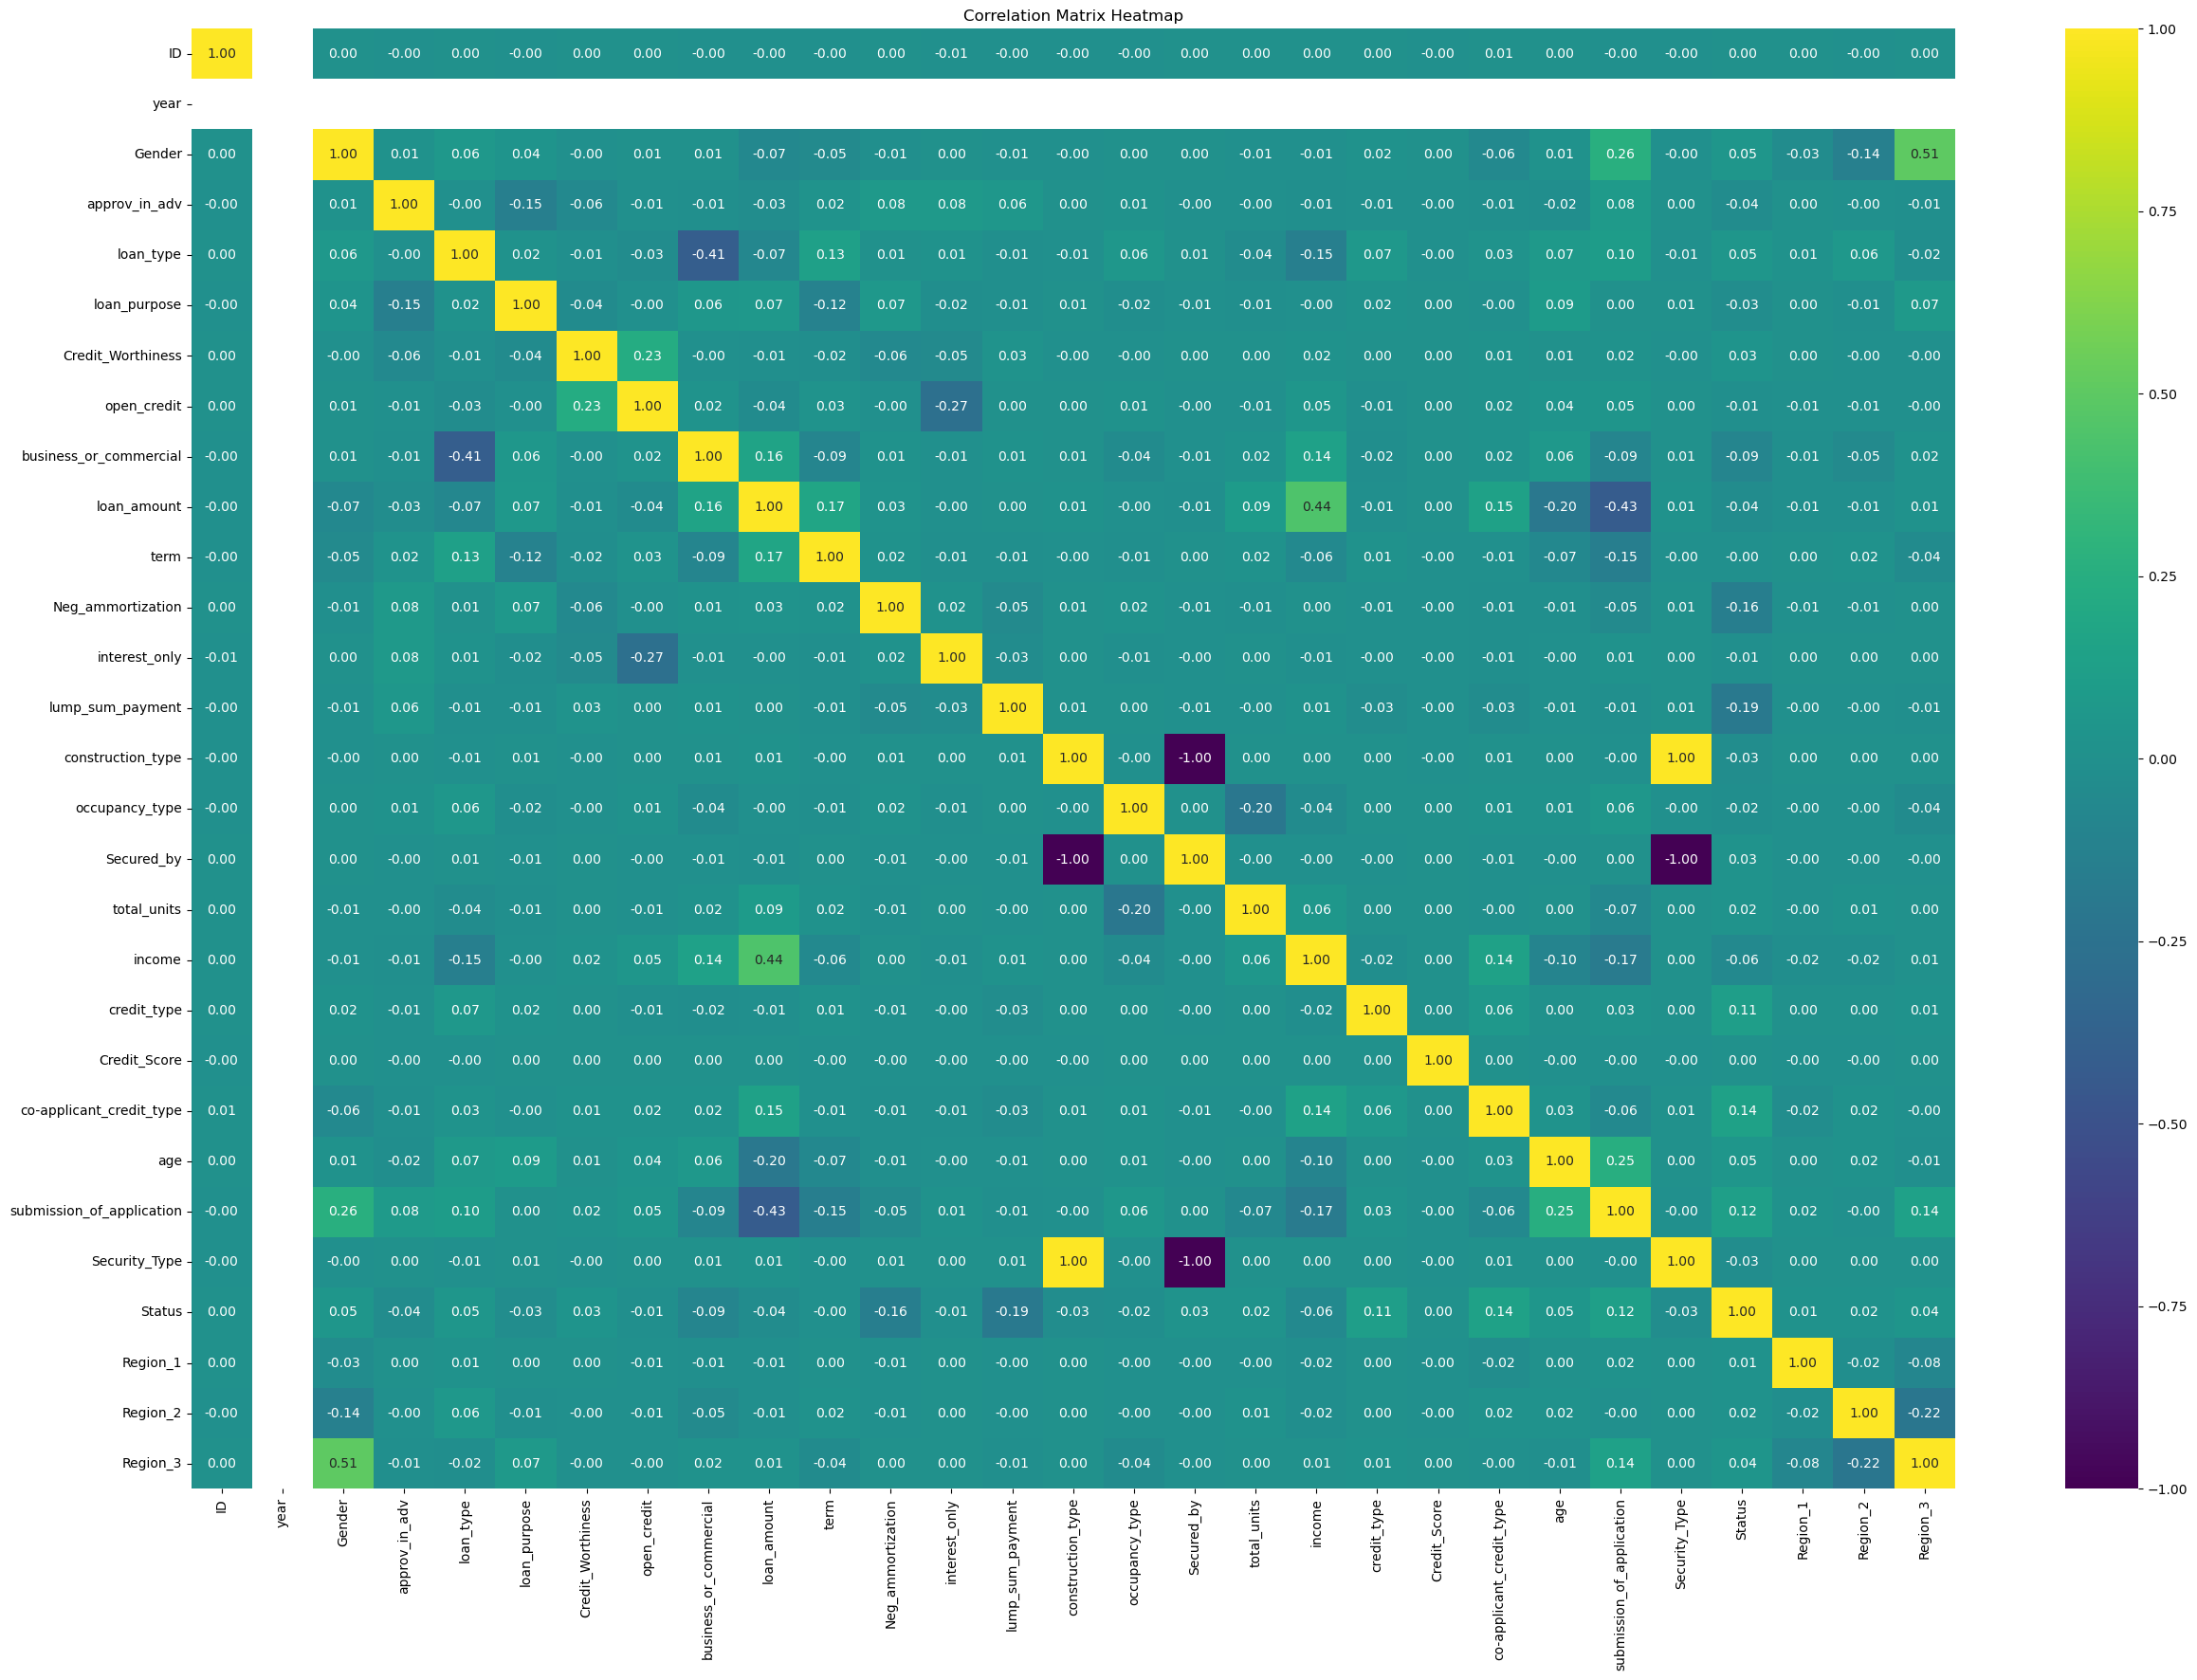

In [69]:
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()